<a href="https://colab.research.google.com/github/Kaustubh-Amare/-EDA_CAPSTONE_Playstore_-_Userdata/blob/main/Playstore_data_analysis_kau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**"Exploratory Data Analysis on Google Play Store App"**

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

> lets connect our Drive for retrival of dataframes required for EDA

In [99]:
# importing numpy and pandas library
import numpy as np
import pandas as pd

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
playstore_df_path = '/content/drive/MyDrive/DATA_SCI_almabetter/Module_1/drive_data/playstore_reviews/Play Store Data.csv'
playstore_df= pd.read_csv(playstore_df_path)

In [102]:
user_review_path = '/content/drive/MyDrive/DATA_SCI_almabetter/Module_1/drive_data/playstore_reviews/User Reviews.csv'
user_review_df = pd.read_csv(user_review_path)

In [103]:
playstore_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [104]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Data cleaning

Step- 0 :- Make a copy of data frame.

In [105]:
wk_ps_df= playstore_df.copy()               # wk_ps_df= working playstore dataframe, to prevent parent dataframe from permanent modification

In [106]:
wk_ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Step-01 :-  look for duplicates then need to change some data forms so as to get more data insights,
primarily changing some data formats from object to int.

In [107]:
# defining function for playstore data frame, which will provide quick info on null valves, unique counts of each column and data types.
def complete_playstore_info():
    null = pd.DataFrame(index=wk_ps_df.columns)
    null['data_type'] = wk_ps_df.dtypes
    null['null_count'] = wk_ps_df.isnull().sum()
    null['unique_count'] = wk_ps_df.nunique()
    return null

In [108]:
complete_playstore_info()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


In [109]:
wk_ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Lets check for duplicate values in the data set 

In [110]:
print("Number of Unique App names = ", len(wk_ps_df['App'].unique()))
print("NUMBER of the Total App name = ", wk_ps_df.shape[0])
print("Duplicate Apps = ",len(wk_ps_df['App'])- len(wk_ps_df['App'].unique()))

Number of Unique App names =  9660
NUMBER of the Total App name =  10841
Duplicate Apps =  1181


Thus, its practical to drop the duplicate values as they will create deviation in the statistical analysis

In [111]:
wk_ps_df.drop_duplicates(subset = 'App', keep = 'first' ,inplace = True)

Converting data types of selective columns from object to suitable format. 

In [112]:
#wk_ps_df['Reviews']= wk_ps_df['Reviews'].astype('int')             # didnt because got some error some error due to in correct data, Error:invalid literal for int() with base 10: '3.0M'


In [113]:
# finding the this entry of 3.0M preventing conversion
wk_ps_df[wk_ps_df['Reviews']=='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [114]:
''' This above Entry no_ 10472 searched for mistaked entry of 3.0M in Review column have lots of misentered data in multiple columns like
in Genres Ratings, category this might affect the further EDA and typeconversion, thus dropping this column   ''' 

wk_ps_df.drop([10472] , inplace= True )
wk_ps_df[10471:10476]                                                # Row 10472 droppd successfully.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [115]:
wk_ps_df['Reviews']= wk_ps_df['Reviews'].astype('int')  # reviews datatype is successfully converted to int

In [116]:
wk_ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.0+ MB


In [117]:
# to convert installs column from object to int
wk_ps_df['Installs_']=wk_ps_df['Installs'].str.replace(',','') 
wk_ps_df['Installs__']=wk_ps_df['Installs_'].str.replace('+','') 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [118]:
wk_ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_,Installs__
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000+,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000+,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000+,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000+,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000+,100000


In [119]:
wk_ps_df['Installs__']= wk_ps_df['Installs__'].astype('int')

In [120]:
wk_ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_,Installs__
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000+,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000+,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000+,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000+,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000+,100000


In [121]:
wk_ps_df.drop(['Installs', 'Installs_'], axis = 1, inplace = True)

In [122]:
wk_ps_df.head()

,App,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs__
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000


In [123]:
# Installs column successfully changed from object to int
wk_ps_df.rename(columns={'Installs__': 'Installs'},
          inplace=True)                                      

In [124]:
wk_ps_df.head()

,App,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000


In [125]:
# working on size column

for size in wk_ps_df['Size'].unique():
  print(size)                                 # there is various kind of format in data, need a funtion to homoginize it.

19M
14M
8.7M
25M
2.8M
5.6M
29M
33M
3.1M
28M
12M
20M
21M
37M
2.7M
5.5M
17M
39M
31M
4.2M
7.0M
23M
6.0M
6.1M
4.6M
9.2M
5.2M
11M
24M
Varies with device
9.4M
15M
10M
1.2M
26M
8.0M
7.9M
56M
57M
35M
54M
201k
3.6M
5.7M
8.6M
2.4M
27M
2.5M
16M
3.4M
8.9M
3.9M
2.9M
38M
32M
5.4M
18M
1.1M
2.2M
4.5M
9.8M
52M
9.0M
6.7M
30M
2.6M
7.1M
3.7M
22M
7.4M
6.4M
3.2M
8.2M
9.9M
4.9M
9.5M
5.0M
5.9M
13M
73M
6.8M
3.5M
4.0M
2.3M
7.2M
2.1M
42M
7.3M
9.1M
55M
23k
6.5M
1.5M
7.5M
51M
41M
48M
8.5M
46M
8.3M
4.3M
4.7M
3.3M
40M
7.8M
8.8M
6.6M
5.1M
61M
66M
79k
8.4M
118k
44M
695k
1.6M
6.2M
18k
53M
1.4M
3.0M
5.8M
3.8M
9.6M
45M
63M
49M
77M
4.4M
4.8M
70M
6.9M
9.3M
10.0M
8.1M
36M
84M
97M
2.0M
1.9M
1.8M
5.3M
47M
556k
526k
76M
7.6M
59M
9.7M
78M
72M
43M
7.7M
6.3M
334k
34M
93M
65M
79M
100M
58M
50M
68M
64M
67M
60M
94M
232k
99M
624k
95M
8.5k
41k
292k
11k
80M
1.7M
74M
62M
69M
75M
98M
85M
82M
96M
87M
71M
86M
91M
81M
92M
83M
88M
704k
862k
899k
378k
266k
375k
1.3M
975k
980k
4.1M
89M
696k
544k
525k
920k
779k
853k
720k
713k
772k
318k
58k
241k


In [126]:
# making function for size column data conversion from object to float and from KB to MB.

def size_formatting(size):
  if size[-1]== 'M':
    size= size[:-1]
    return size
    # print(size)

  elif size[-1]=='k':
    size= float(size[:-1])/1024
    return size
    # print(size)  

  elif size=='1,000+':
    size= 1.0
    return size
    # print (size)

  else:
    size= np.nan
    return size
    

In [127]:
wk_ps_df['Size']= wk_ps_df['Size'].apply(size_formatting)

In [128]:
wk_ps_df.rename(columns={'Size': 'Size(in MB)'},
          inplace=True)                                         

In [129]:
wk_ps_df.head()

,App,Category,Rating,Reviews,Size(in MB),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000


In [130]:
wk_ps_df.tail()                                                          

,App,Category,Rating,Reviews,Size(in MB),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,5000
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,100
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,1000
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,1000
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19,Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device,10000000


In [131]:
 # size column data conversion done successfully
wk_ps_df['Size(in MB)']= wk_ps_df['Size(in MB)'].astype('float')      

In [132]:
wk_ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size(in MB)     8432 non-null   float64
 5   Type            9658 non-null   object 
 6   Price           9659 non-null   object 
 7   Content Rating  9659 non-null   object 
 8   Genres          9659 non-null   object 
 9   Last Updated    9659 non-null   object 
 10  Current Ver     9651 non-null   object 
 11  Android Ver     9657 non-null   object 
 12  Installs        9659 non-null   int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


In [133]:
# converting Price from object to float 
wk_ps_df['Price'].unique()                  

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [134]:
# defining function for formatting price
def price_formatting(price):
  if price[0]=="$":
    return price[1:]
  else:
    return 0.0

In [135]:
wk_ps_df['Price']= wk_ps_df['Price'].apply(price_formatting)

In [136]:
wk_ps_df.head()

,App,Category,Rating,Reviews,Size(in MB),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000


In [137]:
wk_ps_df['Price']= wk_ps_df['Price'].astype('float')

In [138]:
# Price is converted from object to column
wk_ps_df.rename(columns={'Price': 'Price (in $)'},
          inplace=True)                                           

In [139]:
wk_ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size(in MB)     8432 non-null   float64
 5   Type            9658 non-null   object 
 6   Price (in $)    9659 non-null   float64
 7   Content Rating  9659 non-null   object 
 8   Genres          9659 non-null   object 
 9   Last Updated    9659 non-null   object 
 10  Current Ver     9651 non-null   object 
 11  Android Ver     9657 non-null   object 
 12  Installs        9659 non-null   int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


In [140]:
# def name_fromatting(stri_ng):
#   return stri_ng.replace(' ','_')
  

> Null value reduction

In [141]:
#Finding the mode value and replacing with the null values present.
modeValueRating = wk_ps_df['Rating'].mode()
print(f' The mode value is: {modeValueRating[0]}')
wk_ps_df['Rating'].fillna(value=modeValueRating[0], inplace = True)

 The mode value is: 4.3


In [142]:
complete_playstore_info()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,5330
Size(in MB),float64,1227,459
Type,object,1,2
Price (in $),float64,0,92
Content Rating,object,0,6
Genres,object,0,118
Last Updated,object,0,1377


Thus, complete data is obtained as you can see


*   All the null valuves are reduced to zero
*   **Letting some null values from Size in MB as there are because of "varies with device"** introduced as there was no suitable replacement



In [143]:
wk_ps_df.head()

,App,Category,Rating,Reviews,Size(in MB),Type,Price (in $),Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000


In [144]:
wk_ps_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [145]:
# Converting Category column from object to string
wk_ps_df['Category']= wk_ps_df['Category'].astype('string')

In [146]:
wk_ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   string 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size(in MB)     8432 non-null   float64
 5   Type            9658 non-null   object 
 6   Price (in $)    9659 non-null   float64
 7   Content Rating  9659 non-null   object 
 8   Genres          9659 non-null   object 
 9   Last Updated    9659 non-null   object 
 10  Current Ver     9651 non-null   object 
 11  Android Ver     9657 non-null   object 
 12  Installs        9659 non-null   int64  
dtypes: float64(3), int64(2), object(7), string(1)
memory usage: 1.0+ MB


In [147]:
# data type of all required columns are changed succesfully 

## **Step 2:- Data wrangling and data visualization**

In [148]:
wk_ps_df.describe()                             # many insights can be estimated using the numbers.

,Rating,Reviews,Size(in MB),Price (in $),Installs
count,9659.000000,9.659000e+03,8432.000000,9659.000000,9.659000e+03
mean,4.192442,2.165926e+05,20.394897,1.099299,7.777507e+06
std,0.496397,1.831320e+06,21.827898,16.852152,5.375828e+07
min,1.000000,0.000000e+00,0.008301,0.000000,0.000000e+00
25%,4.000000,2.500000e+01,4.600000,0.000000,1.000000e+03
50%,4.300000,9.670000e+02,12.000000,0.000000,1.000000e+05
75%,4.500000,2.940100e+04,28.000000,0.000000,1.000000e+06
max,5.000000,7.815831e+07,100.000000,400.000000,1.000000e+09


In [149]:
#for finding top 10 apps by Sizes
wk_ps_df.sort_values(by='Size(in MB)', axis=0, ascending=0, inplace=False)[0:11]
                      

,App,Category,Rating,Reviews,Size(in MB),Type,Price (in $),Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
1758,Hungry Shark Evolution,GAME,4.5,6074334,100.0,Free,0.00,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up,100000000
4690,Vi Trainer,HEALTH_AND_FITNESS,3.6,124,100.0,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",2.0.0.11,5.0 and up,5000
8409,Car Crash III Beam DH Real Damage Simulator 2018,GAME,3.6,151,100.0,Free,0.00,Everyone,Racing,"May 20, 2018",1.03,4.1 and up,10000
5530,The Walking Dead: Our World,GAME,4.0,22435,100.0,Free,0.00,Teen,Action,"August 1, 2018",1.1.0.3,5.0 and up,1000000
7404,SimCity BuildIt,FAMILY,4.5,4218587,100.0,Free,0.00,Everyone 10+,Simulation,"June 19, 2018",1.23.3.75024,4.0 and up,50000000
1080,Post Bank,FINANCE,4.5,60449,100.0,Free,0.00,Everyone,Finance,"July 23, 2018",2.9.12,4.0 and up,1000000
5427,Ultimate Tennis,SPORTS,4.3,183004,100.0,Free,0.00,Everyone,Sports,"July 19, 2018",2.29.3118,4.0.3 and up,10000000
2299,Navi Radiography Pro,MEDICAL,4.7,11,100.0,Paid,15.99,Everyone,Medical,"January 14, 2018",1.2.0,4.0.3 and up,500
5862,Miami crime simulator,GAME,4.0,254518,100.0,Free,0.00,Mature 17+,Action,"July 9, 2018",2.0,4.0 and up,10000000
9170,Stickman Legends: Shadow Wars,GAME,4.4,38419,100.0,Paid,0.99,Everyone 10+,Action,"August 3, 2018",2.3.24,4.1 and up,1000000


In [150]:
# top 10 highly Rated Apps
wk_ps_df.sort_values(by=['Installs'], axis=0, ascending=0, inplace=False)[0:100]


,App,Category,Rating,Reviews,Size(in MB),Type,Price (in $),Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,NaN,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device,1000000000
1654,Subway Surfers,GAME,4.5,27722264,76.0,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,1000000000
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,NaN,Free,0.0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device,1000000000
340,Gmail,COMMUNICATION,4.3,4604324,NaN,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,1000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4688,VivaVideo - Video Editor & Photo Movie,VIDEO_PLAYERS,4.6,9879473,40.0,Free,0.0,Teen,Video Players & Editors,"August 4, 2018",7.2.1,4.1 and up,100000000
363,Who,COMMUNICATION,4.3,2451083,NaN,Free,0.0,Teen,Communication,"August 3, 2018",Varies with device,Varies with device,100000000
365,WeChat,COMMUNICATION,4.2,5387333,NaN,Free,0.0,Everyone,Communication,"July 31, 2018",Varies with device,Varies with device,100000000
366,UC Browser Mini -Tiny Fast Private & Secure,COMMUNICATION,4.4,3648120,3.3,Free,0.0,Teen,Communication,"July 18, 2018",11.4.0,4.0 and up,100000000


In [151]:
# top 10 highly reviewd apps
wk_ps_df.sort_values(by='Reviews', axis=0, ascending=0, inplace=False)[0:11]

,App,Category,Rating,Reviews,Size(in MB),Type,Price (in $),Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
2544,Facebook,SOCIAL,4.1,78158306,NaN,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,1000000000
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000
2545,Instagram,SOCIAL,4.5,66577313,NaN,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,1000000000
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1000000000
1670,Clash of Clans,GAME,4.6,44891723,98.0,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,100000000
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,NaN,Free,0.0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device,500000000
1654,Subway Surfers,GAME,4.5,27722264,76.0,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,1000000000
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,NaN,Free,0.0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device,1000000000
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,NaN,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device,500000000
1660,Clash Royale,GAME,4.6,23133508,97.0,Free,0.0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up,100000000


In [152]:
wk_ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   string 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size(in MB)     8432 non-null   float64
 5   Type            9658 non-null   object 
 6   Price (in $)    9659 non-null   float64
 7   Content Rating  9659 non-null   object 
 8   Genres          9659 non-null   object 
 9   Last Updated    9659 non-null   object 
 10  Current Ver     9651 non-null   object 
 11  Android Ver     9657 non-null   object 
 12  Installs        9659 non-null   int64  
dtypes: float64(3), int64(2), object(7), string(1)
memory usage: 1.0+ MB


In [153]:
#  ps_catergories1 = wk_ps_df.groupby('Category').agg('Size(in MB)').unstack()
#  ps_catergories1.head()                                                               #  not worked

In [154]:
category_db =  wk_ps_df[['App', 'Category','Rating','Size(in MB)','Price (in $)','Installs']]
category_db                                                   # work on category_db

,App,Category,Rating,Size(in MB),Price (in $),Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,19.0,0.0,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,14.0,0.0,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,8.7,0.0,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,25.0,0.0,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.8,0.0,100000
...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,53.0,0.0,5000
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,3.6,0.0,100
10838,Parkinson Exercices FR,MEDICAL,4.3,9.5,0.0,1000
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,NaN,0.0,1000


In [155]:
categorically_grouped_db= category_db.groupby('Category').agg({'Size(in MB)':'sum', 'Rating':'mean', 'Installs':'sum'})
categorically_grouped_db

,Size(in MB),Rating,Installs
Category,,,
ART_AND_DESIGN,767.000000,4.354687,114338100
AUTO_AND_VEHICLES,1502.760547,4.205882,53130211
BEAUTY,648.400000,4.283019,27197050
BOOKS_AND_REFERENCE,2548.007031,4.334234,1665969576
BUSINESS,5213.950977,4.173810,697164865
COMICS,675.928320,4.185714,44981150
COMMUNICATION,2736.126172,4.154921,11038276251
DATING,2490.117578,4.041520,140926107
EDUCATION,1696.056641,4.363866,352952000


In [156]:
# categorically_grouped_db= category_db.groupby('Category').agg('App').unstack()
# categorically_grouped_db.head()

In [157]:
ps_catergories = wk_ps_df.groupby('Category')

## Data visualtizaton

Importing visulization library packages

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

1. highest rated  category

In [159]:
ps_category_ratings = wk_ps_df.groupby('Category', as_index= False )['Rating'].mean()
ps_category_ratings

,Category,Rating
0,ART_AND_DESIGN,4.354687
1,AUTO_AND_VEHICLES,4.205882
2,BEAUTY,4.283019
3,BOOKS_AND_REFERENCE,4.334234
4,BUSINESS,4.173810
5,COMICS,4.185714
6,COMMUNICATION,4.154921
7,DATING,4.041520
8,EDUCATION,4.363866
9,ENTERTAINMENT,4.135294


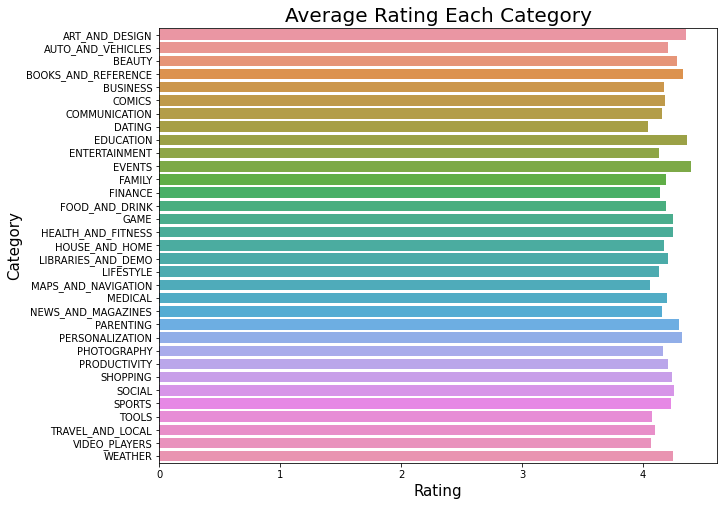

In [160]:
plt.figure(figsize=(10,8))
sns.barplot(data= ps_category_ratings, x='Rating', y='Category')
plt.title('Average Rating Each Category', fontsize=20)
plt.xlabel ('Rating', fontsize=15)
plt.ylabel ('Category', fontsize=15)
plt.show()

In [161]:
#print(average ratings)

In [162]:
"Events category is highest rated category"

'Events category is highest rated category'

In [163]:
ps_category_size = wk_ps_df.groupby('Category', as_index=False)['Size(in MB)'].mean()
ps_category_size

,Category,Size(in MB)
0,ART_AND_DESIGN,12.370968
1,AUTO_AND_VEHICLES,20.036807
2,BEAUTY,13.795745
3,BOOKS_AND_REFERENCE,13.134057
4,BUSINESS,13.866891
5,COMICS,13.794456
6,COMMUNICATION,11.306306
7,DATING,15.661117
8,EDUCATION,19.056816
9,ENTERTAINMENT,23.043750


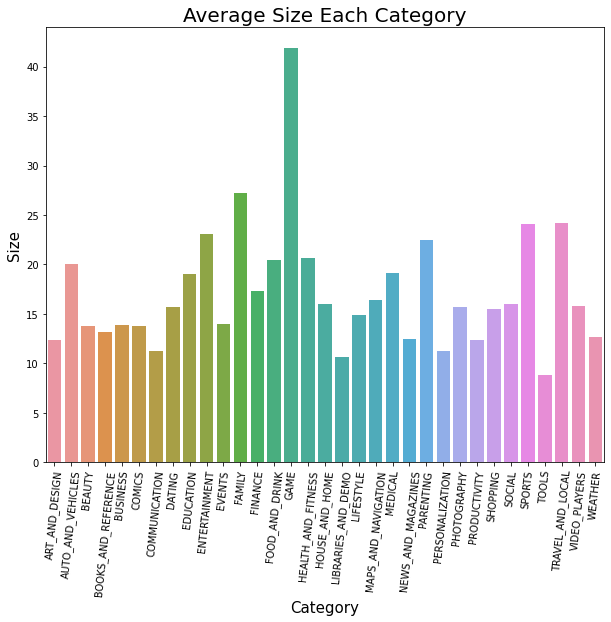

In [164]:
plt.figure(figsize=(10,8))
sns.barplot(data= ps_category_size, x='Category', y='Size(in MB)')
plt.title('Average Size Each Category', fontsize=20)
plt.xlabel ('Category', fontsize=15)
plt.ylabel ('Size', fontsize=15)
plt.xticks(rotation = 84)
plt.show()

In [165]:
#some of the largest apps from the category falls under games 

In [166]:
ps_category_installs = wk_ps_df.groupby('Category', as_index=False)['Installs'].sum()
ps_category_installs

,Category,Installs
0,ART_AND_DESIGN,114338100
1,AUTO_AND_VEHICLES,53130211
2,BEAUTY,27197050
3,BOOKS_AND_REFERENCE,1665969576
4,BUSINESS,697164865
5,COMICS,44981150
6,COMMUNICATION,11038276251
7,DATING,140926107
8,EDUCATION,352952000
9,ENTERTAINMENT,2113660000


In [167]:
#Finding the top 10 categories
Top10_categories=wk_ps_df['Category'].value_counts().reset_index().head(10)
Top10_categories.rename(columns={'index':'Category','Category':'Count'},inplace=True)
Top10_categories

,Category,Count
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395
5,PERSONALIZATION,376
6,PRODUCTIVITY,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


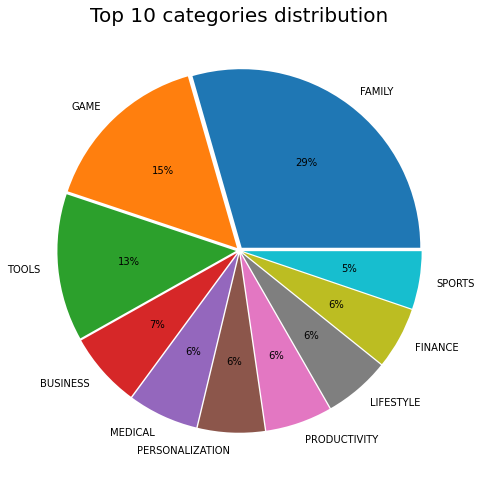

In [168]:
#Plotting Distribution of top 10 categories
plt.figure(figsize=(8,10))
plt.pie(Top10_categories['Count'],labels=Top10_categories['Category'],autopct='%.0f%%',explode=[0.02]*10)
plt.title('Top 10 categories distribution', fontsize= 20)
plt.show()

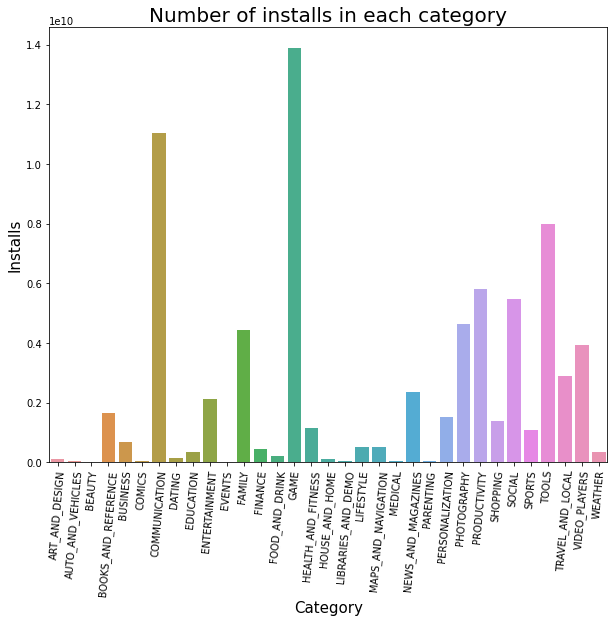

In [169]:
plt.figure(figsize=(10,8))
sns.barplot(data= ps_category_installs, x='Category', y='Installs')
plt.title('Number of installs in each category', fontsize=20)
plt.xlabel ('Category', fontsize=15)
plt.ylabel ('Installs', fontsize=15)
plt.xticks(rotation = 85)
plt.show()

> As you can see from the graph above game have highest no of installs, followed by communucation and tools   

In [170]:
ps_category_Reviews = wk_ps_df.groupby('Category', as_index=False)['Reviews'].sum()
ps_category_Reviews

,Category,Reviews
0,ART_AND_DESIGN,1419203
1,AUTO_AND_VEHICLES,1163666
2,BEAUTY,396240
3,BOOKS_AND_REFERENCE,16721314
4,BUSINESS,9890245
5,COMICS,2342071
6,COMMUNICATION,285811368
7,DATING,3623544
8,EDUCATION,13364148
9,ENTERTAINMENT,34762650


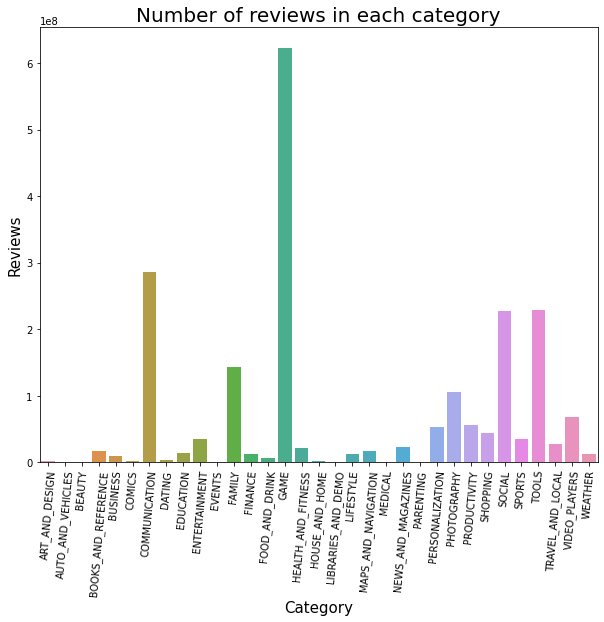

In [171]:
plt.figure(figsize=(10,8))
sns.barplot(data= ps_category_Reviews, x='Category', y='Reviews')
plt.title('Number of reviews in each category', fontsize=20)
plt.xlabel ('Category', fontsize=15)
plt.ylabel ('Reviews', fontsize=15)
plt.xticks(rotation = 85)
plt.show() 

In [172]:
categorically_grouped_db= category_db.groupby('Category').agg({'Size(in MB)':'sum', 'Rating':'mean', 'Installs':'sum'})
categorically_grouped_db

,Size(in MB),Rating,Installs
Category,,,
ART_AND_DESIGN,767.000000,4.354687,114338100
AUTO_AND_VEHICLES,1502.760547,4.205882,53130211
BEAUTY,648.400000,4.283019,27197050
BOOKS_AND_REFERENCE,2548.007031,4.334234,1665969576
BUSINESS,5213.950977,4.173810,697164865
COMICS,675.928320,4.185714,44981150
COMMUNICATION,2736.126172,4.154921,11038276251
DATING,2490.117578,4.041520,140926107
EDUCATION,1696.056641,4.363866,352952000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


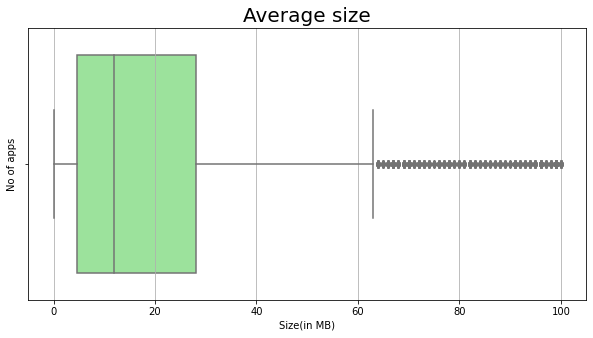

In [173]:
# Plotting a boxplot graph to determine size distribution
plt.figure(figsize=(10,5))
plt.xlabel("Size(in MB)")
plt.ylabel("No of apps")
plt.grid()
size_distribution_graph = sns.boxplot(wk_ps_df['Size(in MB)'], color="lightgreen")
plt.title('Average size',size = 20);

In [174]:
print('The median size of an App in playstore is',wk_ps_df['Size(in MB)'].median())
print('The maximum size of an App in playstore is',wk_ps_df['Size(in MB)'].max())

The median size of an App in playstore is 12.0
The maximum size of an App in playstore is 100.0


As we can see from the box plot above,
*   25% of apps are under 5 MB
*   25% of apps are between 30 Mb to 63 Mb
*   Majority i.e. 50% lies between 5 Mb to 30 Mb.
*   Many outliers are all the way upto 100 Mb
*   Median is 12 Mb

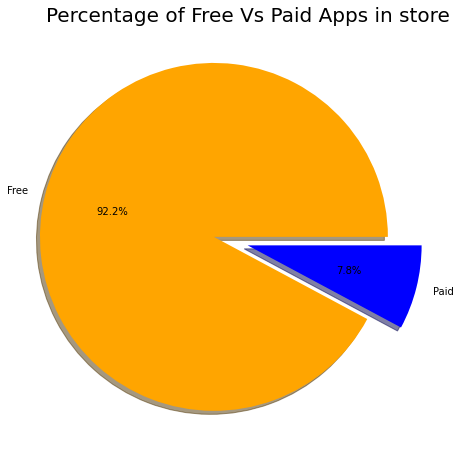

In [175]:
# plotting a graph between free and paid apps
plt.figure(figsize=(8,8))
labels = wk_ps_df['Type'].value_counts(sort = True).index
sizes = wk_ps_df['Type'].value_counts(sort = True)
colors = ["orange","blue"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percentage of Free Vs Paid Apps in store',size = 20)
plt.show()

As we can see from Piechart above maximum apps on playstore are freely available.

In [176]:
# categorically_grouped_db= category_db.groupby('Category').agg({'App':'sum'})
# categorically_grouped_db

In [177]:
# def name_formatting(stri_ng):
  # return stri_ng.replace(' ','_')

# **Lets start with user review data frame**

Step 0: to make copy of User review data

In [178]:
us_rw_df= user_review_df.copy()

In [179]:
us_rw_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


Proccessing null values 

In [180]:
#data of Translated null values
us_rw_df[us_rw_df['Translated_Review'].isnull()].head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN


In [181]:
#Dropping Nulls of Translated Review as all other feature values are also null 
us_rw_df.dropna(subset=['Translated_Review'],inplace=True)

In [182]:
#Checking data after removing nulls
us_rw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


**Merging Playstore data frame and user review data frame**

In [183]:
#unique apps is user_reviews_data
us_rw_df['App'].nunique()

865

In [184]:
#unique apps is play_store_data
wk_ps_df['App'].nunique()

9659

In [185]:
#Merging both data
combined_data=pd.merge(wk_ps_df,us_rw_df, on='App')

In [186]:
#Unique Apps in combined data
combined_data['App'].nunique()

816

In [187]:
#About combined data
combined_data.isnull().sum()

App                           0
Category                      0
Rating                        0
Reviews                       0
Size(in MB)               11860
Type                          0
Price (in $)                  0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   0
Installs                      0
Translated_Review             0
Sentiment                     0
Sentiment_Polarity            0
Sentiment_Subjectivity        0
dtype: int64

##Analysis Of Combined Data

Overall sentiment analysis 

In [188]:
#Sentiment count
sentiment_count= combined_data.Sentiment.value_counts().reset_index().rename(columns={'index':'Sentiment','Sentiment':'count'})
sentiment_count

,Sentiment,count
0,Positive,23073
1,Negative,8005
2,Neutral,4851


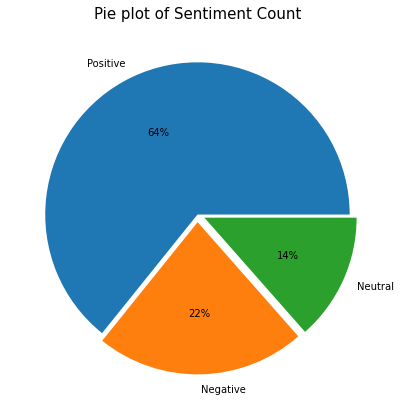

In [189]:
#Pieplot of Sentiment Count
plt.rcParams['figure.figsize'] = (15, 7)
plt.pie(sentiment_count['count'],labels=sentiment_count['Sentiment'],autopct='%.0f%%',explode=(0,0.05,0.05))
plt.title('Pie plot of Sentiment Count',size=15)
plt.show()

This chart interprets that most of the reviews are positive.

In [190]:
#Categoriwise Sentiment Count
categoriwise_sentiment_count=combined_data.groupby(['Category','Sentiment'])['Sentiment'].count().reset_index(name='count')
categoriwise_sentiment_count.head()

,Category,Sentiment,count
0,ART_AND_DESIGN,Negative,61
1,ART_AND_DESIGN,Neutral,62
2,ART_AND_DESIGN,Positive,259
3,AUTO_AND_VEHICLES,Negative,17
4,AUTO_AND_VEHICLES,Neutral,36


Text(0, 0.5, 'Sentiments')

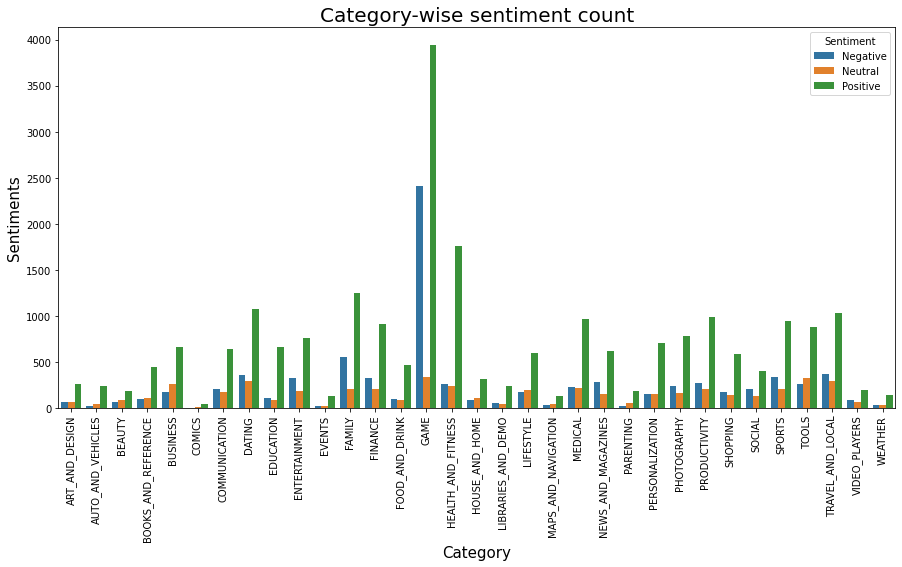

In [191]:
#Barplot of categoriwise_sentiment_count
sns.barplot(x="Category", y="count", hue="Sentiment", data=categoriwise_sentiment_count)
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("Category-wise sentiment count",fontsize=20)
plt.xlabel("Category", fontsize= 15)
plt.ylabel("Sentiments", fontsize= 15)

# **Conclusion**

**Game category has the highest engagement**

  •	Thus, if fast growth is expected then introducing good quality game app of suitable size can work as a charm. 

**Opportunities**

  •	Various apps category like Medical, food & drinks, Health & fitness and business & finances have positive sentimental advantage from users but the population of apps is less in those categories creating opportunities for new players

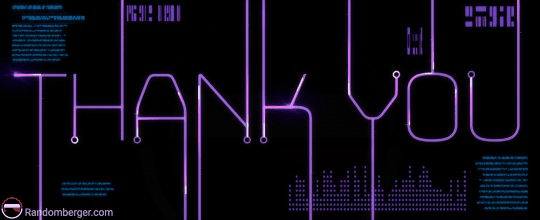